In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

In [4]:
df = pd.read_excel('Survey-form Clean Data.xlsx')

In [5]:
df = df.rename(columns = {'Have you ever invested in Cryptocurrencies?' : 'Invested?', 'Decentralization (the absence of any central authority like a govt. body/department)' : 'Decentralization_importance'})

In [6]:
df = df[['Invested?', 'Decentralization_importance']]
maping = {
    1 : 'Strongly Disagree',
    2 : 'Disagree',
    3 : 'No Impact',
    4 : 'Agree',
    5 : 'Strongly Agree'
}
df['Decentralization_importance'] = df['Decentralization_importance'].map(maping)

In [7]:
df['Invested?'].value_counts()

No     123
Yes     53
Name: Invested?, dtype: int64

In [8]:
df['Decentralization_importance'].value_counts()

No Impact            48
Strongly Agree       44
Strongly Disagree    35
Agree                30
Disagree             19
Name: Decentralization_importance, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

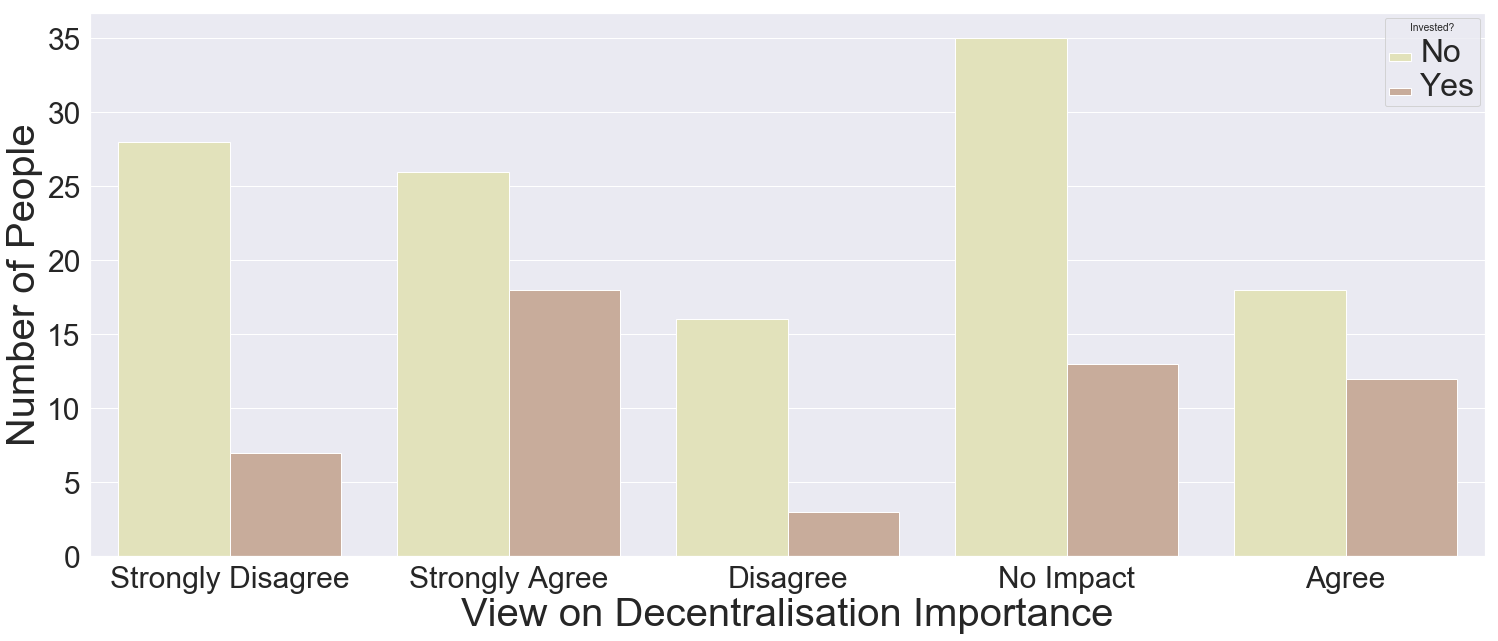

In [25]:
sns.set(style="darkgrid")                                                  
sns.set_palette("pink_r", 3)
fig, ax = plt.subplots(figsize = (25,10))
ax = sns.countplot(x = 'Decentralization_importance', hue = 'Invested?', data = df)
ax.set_ylabel('Number of People', fontsize = 40)
ax.set_xlabel('View on Decentralisation Importance', fontsize = 40)
ax.tick_params(labelsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='32') # for legend text
plt.show()

In [26]:
pd.crosstab(index = df['Decentralization_importance'], columns = df['Invested?'], margins = True)

Invested?,No,Yes,All
Decentralization_importance,,,
Agree,18,12,30
Disagree,16,3,19
No Impact,35,13,48
Strongly Agree,26,18,44
Strongly Disagree,28,7,35
All,123,53,176


In [30]:
df_ct = pd.crosstab(index = df['Decentralization_importance'], columns = df['Invested?'])

In [31]:
df_ct

Invested?,No,Yes
Decentralization_importance,,
Agree,18,12
Disagree,16,3
No Impact,35,13
Strongly Agree,26,18
Strongly Disagree,28,7


In [32]:
from scipy import stats

In [34]:
(chi2, p, dof, _) = stats.chi2_contingency([df_ct.iloc[0].values, df_ct.iloc[1].values, df_ct.iloc[2].values, df_ct.iloc[3].values, df_ct.iloc[4].values])

In [ ]:
print(" Chi2 score:- " , chi2)
print("p-val")